# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [3]:
import pandas as pd
import bz2

with bz2.open("speeches-201718.json.bz2") as source:
    speeches_201718 = pd.read_json(source)

with bz2.open("speeches-201819.json.bz2") as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [4]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [5]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [6]:
parties = sorted(training_data["party"].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by plotting a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

*TODO: Enter your summary here*

In [7]:
training_count = training_data['party'].value_counts()
test_count = test_data['party'].value_counts()

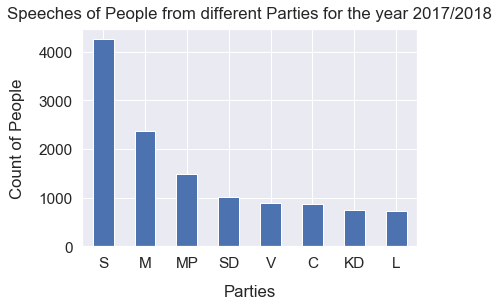

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
training_count.plot(kind='bar',rot=0);
plt.xlabel("Parties", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Speeches of People from different Parties for the year 2017/2018", y=1.02);

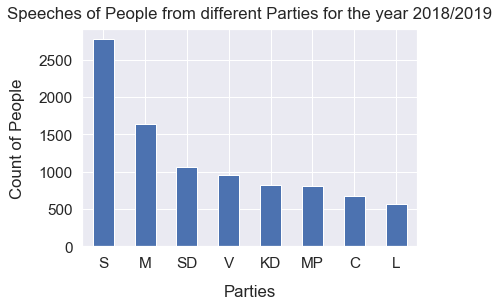

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
test_count.plot(kind='bar', rot=0);
plt.xlabel("Parties", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Speeches of People from different Parties for the year 2018/2019", y=1.02);

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [12]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

In [13]:
#Train the model
text_clf.fit(training_data["words"], training_data["party"])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [14]:
#Predict the test cases using train data
predicted = text_clf.predict(training_data["words"])
print (classification_report(training_data["party"], predicted))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       865
          KD       0.00      0.00      0.00       743
           L       0.00      0.00      0.00       719
           M       0.97      0.01      0.03      2370
          MP       0.00      0.00      0.00      1481
           S       0.35      1.00      0.51      4261
          SD       0.00      0.00      0.00      1010
           V       0.00      0.00      0.00       894

    accuracy                           0.35     12343
   macro avg       0.16      0.13      0.07     12343
weighted avg       0.31      0.35      0.18     12343



C:\Users\TEJASHREE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Predict the test cases using test data
predicted = text_clf.predict(test_data["words"])
print (classification_report(test_data["party"], predicted))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.50      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.10      0.13      0.06      9288
weighted avg       0.18      0.30      0.14      9288



C:\Users\TEJASHREE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Would you have expected the results that you got?

## Problem 3: Baseline

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline for text classification is **Most Frequent Class (MFC)**. One way to think of this baseline is as a classifier that, for every document, predicts that class which appears most often in the training data.

Determine the most frequent class in the 2017/2018 data. What is the accuracy of the MFC baseline on the test data? Given this baseline accuracy, how do you assess the results of the Naive Bayes classifier from Problem&nbsp;2? Answer with a short text.

In [16]:
import numpy as np
from numpy import array

#most frequent class in the 2017/2018 data
MFC = training_count.idxmax()
MFC

'S'

In [17]:
#Accuracy of the MFC baseline on the test data

MFC_test = array([MFC]*test_data.shape[0])
print (classification_report(test_data["party"], MFC_test))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.00      0.00      0.00      1644
          MP       0.00      0.00      0.00       809
           S       0.30      1.00      0.46      2773
          SD       0.00      0.00      0.00      1060
           V       0.00      0.00      0.00       950

    accuracy                           0.30      9288
   macro avg       0.04      0.12      0.06      9288
weighted avg       0.09      0.30      0.14      9288



## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [18]:
import numpy as np
seed = 4
np.random.seed(seed)

import random

minimum_count = training_count.min()
Balanced_data = pd.DataFrame()

for i in training_count.index:
    df=training_data.loc[training_data["party"] == i].index.values
    index = random.sample(list(df), minimum_count)
    Balanced_data = pd.concat([Balanced_data, training_data.loc[index]],
                              axis=0, ignore_index = True)

print (Balanced_data.shape)
print (Balanced_data["party"].value_counts())

(5752, 3)
S     719
SD    719
M     719
L     719
C     719
KD    719
MP    719
V     719
Name: party, dtype: int64


In [19]:
text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

In [20]:
#Train the model
text_clf.fit(Balanced_data["words"], Balanced_data["party"])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [21]:
#Predict the test cases using train data
predicted = text_clf.predict(training_data["words"])
print (classification_report(training_data["party"], predicted))

              precision    recall  f1-score   support

           C       0.66      0.86      0.74       865
          KD       0.49      0.96      0.65       743
           L       0.72      0.95      0.82       719
           M       0.64      0.78      0.70      2370
          MP       0.72      0.64      0.68      1481
           S       0.96      0.50      0.66      4261
          SD       0.77      0.78      0.78      1010
           V       0.56      0.88      0.69       894

    accuracy                           0.70     12343
   macro avg       0.69      0.79      0.71     12343
weighted avg       0.76      0.70      0.70     12343



In [22]:
#Predict the test cases using test data
predicted = text_clf.predict(test_data["words"])
print (classification_report(test_data["party"], predicted))

              precision    recall  f1-score   support

           C       0.31      0.40      0.35       671
          KD       0.24      0.44      0.31       821
           L       0.32      0.36      0.34       560
           M       0.38      0.54      0.45      1644
          MP       0.35      0.33      0.34       809
           S       0.81      0.30      0.43      2773
          SD       0.48      0.35      0.40      1060
           V       0.37      0.53      0.44       950

    accuracy                           0.40      9288
   macro avg       0.41      0.41      0.38      9288
weighted avg       0.49      0.40      0.40      9288



## Problem 5: Confusion matrix

A **confusion matrix** is a specific table layout that is useful when analysing the performance of a classifier. In this matrix, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Your task is to use the confusion matrix to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses $p$ with when it predicts the party of a speaker.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
labels = test_count.index

conf_mat = confusion_matrix(test_data["party"], predicted, 
                              labels = labels)
print (conf_mat)
column = conf_mat.shape[1]
for i in range(column):
    print ("--Class", labels[i] + "--")
    print ("Precise:", round(conf_mat[i, i]/sum(conf_mat[:, i]), 3))
    max_value_index = np.argmax(conf_mat[np.setdiff1d(np.arange(column), i), i])
    if i < max_value_index:
        max_value_index += 1
    print ("Most often confuses party:", labels[max_value_index])
    print ("=============================")

[[820 557 153 336 339 305 144 119]
 [ 29 895  69  96 267  58 142  88]
 [ 20 210 369 117 149  30  84  81]
 [ 22 138  48 502 120  28  46  46]
 [ 19 207  39  68 358  26  67  37]
 [ 76 136  31  97 107 270  57  35]
 [ 16 134  31  63  90  37 268  32]
 [ 10  95  32  74  69  25  53 202]]
--Class S--
Precise: 0.81
Most often confuses party: MP
--Class M--
Precise: 0.377
Most often confuses party: S
--Class SD--
Precise: 0.478
Most often confuses party: S
--Class V--
Precise: 0.371
Most often confuses party: S
--Class KD--
Precise: 0.239
Most often confuses party: S
--Class MP--
Precise: 0.347
Most often confuses party: S
--Class C--
Precise: 0.311
Most often confuses party: S
--Class L--
Precise: 0.316
Most often confuses party: S


## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model instead of the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting $n$-grams up to $n = 2$ (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [25]:
from sklearn.model_selection import GridSearchCV

text_clf = Pipeline([('vec', TfidfVectorizer()), 
                      ('cls', MultinomialNB())])

param_grid = {'vec__binary': (True, False), 
              'vec__ngram_range': ((1,1), (1,2),(2,2)), 
              'cls__alpha': (0.1,0.5,1.0),}
                                                            
grid = GridSearchCV(text_clf, param_grid, cv=5, iid=False, verbose=5, n_jobs=-1)

#Train the model
grid.fit(training_data["words"], training_data["party"])

#Predict the test cases using train data
predicted = grid.predict(training_data["words"])
print(classification_report(training_data["party"], predicted))

#Predict the test cases using test data  
predicted = grid.predict(test_data["words"])
print(classification_report(test_data["party"], predicted))     

#Parameter values that yield best results
print("best parameters:", grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.8min finished
C:\Users\TEJASHREE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


              precision    recall  f1-score   support

           C       1.00      0.47      0.64       865
          KD       1.00      0.38      0.55       743
           L       1.00      0.39      0.56       719
           M       0.84      0.93      0.89      2370
          MP       0.96      0.71      0.82      1481
           S       0.66      1.00      0.79      4261
          SD       1.00      0.65      0.79      1010
           V       1.00      0.60      0.75       894

    accuracy                           0.78     12343
   macro avg       0.93      0.64      0.72     12343
weighted avg       0.85      0.78      0.77     12343

              precision    recall  f1-score   support

           C       1.00      0.01      0.01       671
          KD       1.00      0.00      0.00       821
           L       1.00      0.01      0.01       560
           M       0.42      0.42      0.42      1644
          MP       0.43      0.13      0.20       809
           S       0.36 

## Problem 6: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;5? Answer with a short text.

In [26]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([('vec', TfidfVectorizer()), 
                      ('cls', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000))])

param_grid = {'vec__binary': (True, False),
              'vec__ngram_range': ((1,1), (1,2), (2,2)),}

grid = GridSearchCV(lr_pipeline, param_grid, cv=5, iid=False, verbose=5, n_jobs=-1)

#Train the model
grid.fit(training_data["words"], training_data["party"])

#Predict the test cases using train data
predicted = grid.predict(training_data["words"])
print(classification_report(training_data["party"], predicted))

#Predict the test cases using test data  
predicted = grid.predict(test_data["words"])
print(classification_report(test_data["party"], predicted))     

#Parameter values that yield best results
print("best parameters:", grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 274.9min finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 274.8min remaining:    0.0s
C:\Users\TEJASHREE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


              precision    recall  f1-score   support

           C       0.99      0.61      0.75       865
          KD       0.99      0.56      0.72       743
           L       0.99      0.61      0.76       719
           M       0.79      0.93      0.85      2370
          MP       0.95      0.74      0.83      1481
           S       0.77      0.99      0.87      4261
          SD       0.97      0.81      0.88      1010
           V       0.95      0.76      0.84       894

    accuracy                           0.84     12343
   macro avg       0.93      0.75      0.81     12343
weighted avg       0.87      0.84      0.84     12343

              precision    recall  f1-score   support

           C       0.65      0.18      0.29       671
          KD       0.80      0.09      0.17       821
           L       0.60      0.12      0.20       560
           M       0.44      0.57      0.49      1644
          MP       0.37      0.27      0.31       809
           S       0.47 

*TODO: Enter your answer here*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>